#PROJECT TITLE :   XAI based Image classification using Scrapped Images
#20BCE1300   YASH Deole 
#20BCE1226   ARUN KUMAWAT

In [1]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from bing_image_downloader import downloader
import os

classes = ['German Shepherd', 'Poodle', 'Chihuahua', 'Afghan Hound']
path = '/content/images/'

if not os.path.exists(path):
    os.makedirs(path)

for c in classes:
    downloader.download(c, limit=20, output_dir=path, adult_filter_off=True, force_replace=False, timeout=60)


[%] Downloading Images to /content/images/German Shepherd


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/6/61/20110425_German_Shepherd_Dog_8505.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.publicdomainpictures.net/pictures/30000/velka/german-shepherd.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-jxRboCGxxQs/T-ciYpWY2iI/AAAAAAAACzg/b1xy4rL33TQ/s1600/German+shepherd+images.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://upload.wikimedia.org/wikipedia/commons/5/54/20110425_German_Shepherd_Dog_8473.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/02.Owczarek_niemiecki_użytkowy_krótkowłosy_suka.jpg/1200px-02.Owczarek_niemiecki_użytkowy_krótkowłosy_suka.jpg
[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/02.Owczarek_niemiecki_użytkowy_k

In [ ]:
# !zip -r /content/images.zip /content/images
# from google.colab import files
# files.download("/content/images.zip")

In [ ]:
# !rm -rf '/content/test'
# !rm -rf '/content/train'


In [ ]:
import os
import shutil
import random

# Define the path to the source directory containing all images
src_dir = "/content/images"

# Define the paths to the destination train and test directories
train_dir = "/content/train"
test_dir = "/content/test"

# Create the train and test directories if they do not exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Define the list of image filenames in the source directory
image_filenames = []
for cls in classes:
    cls_dir = os.path.join(src_dir, cls)
    if os.path.isdir(cls_dir):
        for filename in os.listdir(cls_dir):
            image_filenames.append(os.path.join(cls_dir, filename))

# Shuffle the filenames randomly
random.shuffle(image_filenames)

# Calculate the number of images to be moved to the train directory
num_train_images = int(len(image_filenames) * 0.8)

# Move the first num_train_images images to the train directory
for i in range(num_train_images):
    src_path = image_filenames[i]
    cls = os.path.basename(os.path.dirname(src_path))
    dest_path = os.path.join(train_dir, cls)
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    dest_path = os.path.join(dest_path, os.path.basename(src_path))
    shutil.move(src_path, dest_path)

# Move the remaining images to the test directory
for i in range(num_train_images, len(image_filenames)):
    src_path = image_filenames[i]
    cls = os.path.basename(os.path.dirname(src_path))
    dest_path = os.path.join(test_dir, cls)
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    dest_path = os.path.join(dest_path, os.path.basename(src_path))
    shutil.move(src_path, dest_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input,Lambda


In [ ]:
# def rgb_to_gray(images):
#     return tf.image.rgb_to_grayscale(images)

# # Create a Keras model that applies the grayscale conversion to input images
# model = tf.keras.models.Sequential([
#     Input(shape=(256, 256, 3)),
#     Lambda(rgb_to_gray)
# ])

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the first image
# /content/test/German Shepherd
# /content/test/German Shepherd/Image_1.jpg
image1_path = '/content/test/German Shepherd/Image_1.jpg'
image1 = Image.open(image1_path)

# Load the second image
image2_path = '/content/train/German Shepherd/Image_2.jpg'
image2 = Image.open(image2_path)

# Show the images
image1.show()
image2.show()

In [ ]:
d = classes

# CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the parameters for the model and data augmentation
input_shape = (224, 224, 3)
num_classes = len(d)
batch_size = 10
epochs = 25

train_data_dir = '/content/train'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical')

model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs)


Found 318 images belonging to 4 classes.
Epoch 1/25
31/31 [==============================] - 12s 338ms/step - loss: 2.1695 - accuracy: 0.3052
Epoch 2/25
31/31 [==============================] - 10s 336ms/step - loss: 1.3711 - accuracy: 0.3117
Epoch 3/25
31/31 [==============================] - 11s 352ms/step - loss: 1.3593 - accuracy: 0.3604
Epoch 4/25
31/31 [==============================] - 10s 335ms/step - loss: 1.3498 - accuracy: 0.3474
Epoch 5/25
31/31 [==============================] - 11s 345ms/step - loss: 1.2972 - accuracy: 0.3734
Epoch 6/25
31/31 [==============================] - 10s 338ms/step - loss: 1.3553 - accuracy: 0.3377
Epoch 7/25
31/31 [==============================] - 10s 330ms/step - loss: 1.3085 - accuracy: 0.3929
Epoch 8/25
31/31 [==============================] - 11s 337ms/step - loss: 1.3343 - accuracy: 0.3701
Epoch 9/25
31/31 [==============================] - 11s 337ms/step - loss: 1.2796 - accuracy: 0.4416
Epoch 10/25
31/31 [==============================]

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

# MobileNetV3Large

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large

# Define the parameters for the model and data augmentation
input_shape = (224, 224, 3)
num_classes = 4
batch_size = 10
epochs = 25

train_data_dir = '/content/train'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Create the MobileNetV3 Large model
base_model = MobileNetV3Large(input_shape=input_shape, include_top=False, weights=None)
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical')

model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs)


Found 318 images belonging to 4 classes.
Epoch 1/25
31/31 [==============================] - 49s 372ms/step - loss: 1.4663 - accuracy: 0.3279
Epoch 2/25
31/31 [==============================] - 11s 347ms/step - loss: 1.4206 - accuracy: 0.2597
Epoch 3/25
31/31 [==============================] - 11s 348ms/step - loss: 1.3809 - accuracy: 0.2825
Epoch 4/25
31/31 [==============================] - 10s 330ms/step - loss: 1.3852 - accuracy: 0.3019
Epoch 5/25
31/31 [==============================] - 11s 352ms/step - loss: 1.3855 - accuracy: 0.3247
Epoch 6/25
31/31 [==============================] - 11s 354ms/step - loss: 1.3772 - accuracy: 0.3409
Epoch 7/25
31/31 [==============================] - 11s 354ms/step - loss: 1.3643 - accuracy: 0.3344
Epoch 8/25
31/31 [==============================] - 11s 350ms/step - loss: 1.3393 - accuracy: 0.3636
Epoch 9/25
31/31 [==============================] - 11s 350ms/step - loss: 1.3562 - accuracy: 0.2857
Epoch 10/25
31/31 [==============================]

# SVM

In [ ]:
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from skimage.io import imread
from skimage.transform import resize
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

# Define the list of classes
d = ['German Shepherd', 'Poodle', 'Chihuahua', 'Afghan Hound']

# Set the image size, batch size, and number of epochs for training
image_size = (224, 224)

# Define the data augmentation parameters
# You can modify these parameters to suit your needs
rotation_range = 20
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

# Load the images from the train directory
train_path = '/content/train'
train_image_files = glob.glob(os.path.join(train_path, '*/*.jpg'))
num_samples = len(train_image_files)
print("Number of training samples:", num_samples)

# Load the images and their corresponding labels
X_train = []
y_train = []
for image_file in train_image_files:
    image = imread(image_file)
    image = resize(image, image_size)
    X_train.append(image)
    label = os.path.basename(os.path.dirname(image_file))
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Perform data augmentation on the images
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Flatten the images to 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

# Create an SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the SVM classifier
svm.fit(X_train, y_train)

# Evaluate the SVM classifier on the validation set
y_val_pred = svm.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", accuracy)

# Load the test images
test_path = '/content/test'
test_image_files = glob.glob(os.path.join(test_path, '*/*.jpg'))
num_test_samples = len(test_image_files)
print("Number of test samples:", num_test_samples)

X_test = []
y_test = []
for image_file in test_image_files:
    image = imread(image_file)
    image = resize(image, image_size)
    X_test.append(image)
    label = os.path.basename(os.path.dirname(image_file))
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Flatten the test images to 1D arrays
X_test = X_test.reshape(X_test.shape[0], -1)

# Evaluate the SVM classifier on the test set
y_test_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)


Number of training samples: 298
Validation accuracy: 0.4666666666666667
Number of test samples: 74


# DenseNet169

In [ ]:
import os
import glob
import numpy as np
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the list of classes
d = ['German Shepherd', 'Poodle', 'Chihuahua', 'Afghan Hound']

# Set the image size, batch size, and number of epochs for training
image_size = (224, 224)
batch_size = 20
num_epochs = 25

# Define the data augmentation parameters
# You can modify these parameters to suit your needs
rotation_range = 20
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

# Load the images from the train directory
train_path = '/content/train'
train_image_files = glob.glob(os.path.join(train_path, '*/*.jpg'))
num_samples = len(train_image_files)
print("Number of training samples:", num_samples)

# Create an instance of the DenseNet169 model without the top (fully connected) layers
base_model = DenseNet169(include_top=False, weights='imagenet', input_shape=(image_size[0], image_size[1], 3))

# Add a global average pooling layer on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected output layer with softmax activation for multi-class classification
output = Dense(len(d), activation='softmax')(x)

# Create the final model by combining the base model and the output layer
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    fill_mode='nearest'
)

# Generate augmented training data from the image files
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model with augmented data
model.fit_generator(
    train_generator,
    steps_per_epoch=num_samples // batch_size,
    epochs=num_epochs
)

# Save the trained model
model.save('densenet169.h5')
print("Model saved as 'densenet169.h5'")


Number of training samples: 298
51877672/51877672 [==============================] - 0s 0us/step


Found 318 images belonging to 4 classes.


<ipython-input-38-f01e3ecc72f6>:70: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/25
14/14 [==============================] - 124s 1s/step - loss: 1.0650 - accuracy: 0.6619
Epoch 2/25
14/14 [==============================] - 11s 761ms/step - loss: 0.8293 - accuracy: 0.7050
Epoch 3/25
14/14 [==============================] - 11s 768ms/step - loss: 0.6090 - accuracy: 0.7607
Epoch 4/25
14/14 [==============================] - 11s 764ms/step - loss: 0.5442 - accuracy: 0.8094
Epoch 5/25
14/14 [==============================] - 11s 717ms/step - loss: 0.3487 - accuracy: 0.8813
Epoch 6/25
14/14 [==============================] - 11s 739ms/step - loss: 0.4417 - accuracy: 0.8489
Epoch 7/25
14/14 [==============================] - 11s 757ms/step - loss: 0.1760 - accuracy: 0.9460
Epoch 8/25
14/14 [==============================] - 10s 732ms/step - loss: 0.2156 - accuracy: 0.9209
Epoch 9/25
14/14 [==============================] - 11s 763ms/step - loss: 0.1474 - accuracy: 0.9460
Epoch 10/25
14/14 [==============================] - 10s 733ms/step - loss: 0.2266 - accuracy

# Xception

In [ ]:
import os
import glob
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the list of classes
d = ['German Shepherd', 'Poodle', 'Chihuahua', 'Afghan Hound']

# Set the image size, batch size, and number of epochs for training
image_size = (299, 299)
batch_size = 10
num_epochs = 25

# Define the data augmentation parameters
# You can modify these parameters to suit your needs
rotation_range = 20
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

# Load the images from the train directory
train_path = '/content/train'
train_image_files = glob.glob(os.path.join(train_path, '*/*.jpg'))
num_samples = len(train_image_files)
print("Number of training samples:", num_samples)

# Create an instance of the Xception model without the top (fully connected) layers
base_model = Xception(include_top=False, weights='imagenet', input_shape=(image_size[0], image_size[1], 3))

# Add a global average pooling layer on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected output layer with softmax activation for multi-class classification
output = Dense(len(d), activation='softmax')(x)

# Create the final model by combining the base model and the output layer
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    fill_mode='nearest'
)

# Generate augmented training data from the image files
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model with augmented data
model.fit_generator(
    train_generator,
    steps_per_epoch=num_samples // batch_size,
    epochs=num_epochs
)

# Save the trained model
model.save('xception.h5')
print("Model saved as 'xception.h5'")


Number of training samples: 298


Found 318 images belonging to 4 classes.


<ipython-input-40-31cfe8736271>:70: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/25
29/29 [==============================] - 52s 619ms/step - loss: 0.5762 - accuracy: 0.8438
Epoch 2/25
29/29 [==============================] - 15s 506ms/step - loss: 0.4644 - accuracy: 0.8611
Epoch 3/25
29/29 [==============================] - 14s 477ms/step - loss: 0.4837 - accuracy: 0.8542
Epoch 4/25
29/29 [==============================] - 15s 504ms/step - loss: 0.4377 - accuracy: 0.8507
Epoch 5/25
29/29 [==============================] - 14s 489ms/step - loss: 0.2956 - accuracy: 0.9132
Epoch 6/25
29/29 [==============================] - 14s 484ms/step - loss: 0.3848 - accuracy: 0.8681
Epoch 7/25
29/29 [==============================] - 14s 488ms/step - loss: 0.3149 - accuracy: 0.8958
Epoch 8/25
29/29 [==============================] - 14s 486ms/step - loss: 0.2404 - accuracy: 0.9028
Epoch 9/25
29/29 [==============================] - 15s 516ms/step - loss: 0.1116 - accuracy: 0.9655
Epoch 10/25
29/29 [==============================] - 14s 489ms/step - loss: 0.2029 - accura

# InceptionV3

In [ ]:
import os
import glob
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the list of classes
d = ['German Shepherd', 'Poodle', 'Chihuahua', 'Afghan Hound']

# Set the image size, batch size, and number of epochs for training
image_size = (299, 299)
batch_size = 10
num_epochs = 25

# Define the data augmentation parameters
# You can modify these parameters to suit your needs
rotation_range = 20
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

# Load the images from the train directory
train_path = '/content/train'
train_image_files = glob.glob(os.path.join(train_path, '*/*.jpg'))
num_samples = len(train_image_files)
print("Number of training samples:", num_samples)

# Create an instance of the InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(image_size[0], image_size[1], 3))

# Add a global average pooling layer on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected output layer with softmax activation for multi-class classification
output = Dense(len(d), activation='softmax')(x)

# Create the final model by combining the base model and the output layer
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    fill_mode='nearest'
)

# Generate augmented training data from the image files
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model with augmented data
model.fit_generator(
    train_generator,
    steps_per_epoch=num_samples // batch_size,
    epochs=num_epochs
)

# Save the trained model
model.save('inception.h5')
print("Model saved as 'inception.h5'")


Number of training samples: 298
87910968/87910968 [==============================] - 0s 0us/step


Found 318 images belonging to 4 classes.


<ipython-input-42-8043e1fc2c0c>:70: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/25
29/29 [==============================] - 59s 565ms/step - loss: 1.1068 - accuracy: 0.5938
Epoch 2/25
29/29 [==============================] - 13s 449ms/step - loss: 0.9981 - accuracy: 0.6250
Epoch 3/25
29/29 [==============================] - 13s 450ms/step - loss: 0.7124 - accuracy: 0.7326
Epoch 4/25
29/29 [==============================] - 13s 440ms/step - loss: 0.7288 - accuracy: 0.7188
Epoch 5/25
29/29 [==============================] - 13s 442ms/step - loss: 0.7128 - accuracy: 0.7535
Epoch 6/25
29/29 [==============================] - 13s 449ms/step - loss: 0.6113 - accuracy: 0.7778
Epoch 7/25
29/29 [==============================] - 13s 460ms/step - loss: 0.6435 - accuracy: 0.7604
Epoch 8/25
29/29 [==============================] - 13s 449ms/step - loss: 0.5329 - accuracy: 0.8056
Epoch 9/25
29/29 [==============================] - 13s 454ms/step - loss: 0.5028 - accuracy: 0.8576
Epoch 10/25
29/29 [==============================] - 13s 447ms/step - loss: 0.7250 - accura

In [ ]:
SVM 46.67%
CNN 55.83%
MobileNetV3Large 42.53%
DenseNet 95.68%
Inception 92.36%
Xception 98.61%

#XAI TOOL SHAP

In [ ]:
pip install shap

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [04:29, 134.58s/it]


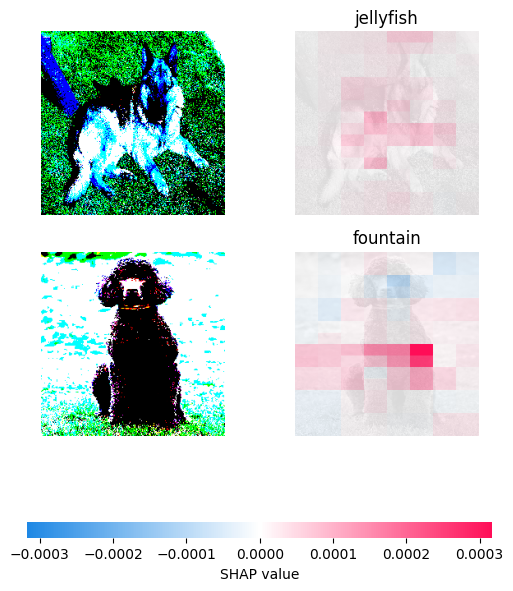

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import json
import shap
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# load pre-trained model and choose two images to explain
model = ResNet50(weights='imagenet')
def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# load dog breed images and preprocess them
img_paths = ['/content/train/German Shepherd/Image_1.jpg', '/content/train/Poodle/Image_1.jpg']
imgs = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    imgs.append(img)
X = preprocess_input(np.array(imgs))

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [04:29, 134.66s/it]


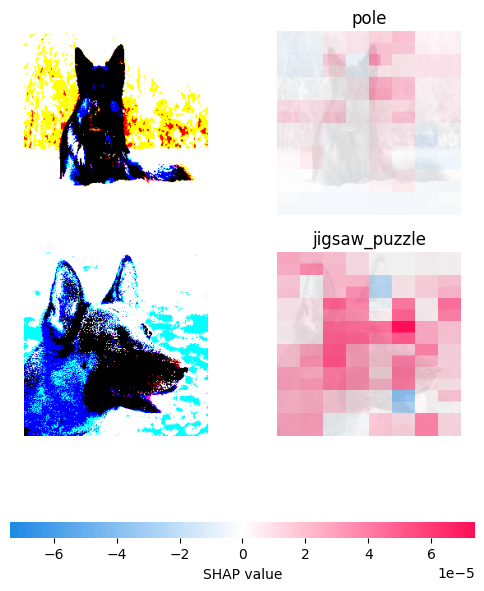

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import json
import shap
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# load pre-trained model and choose two images to explain
model = ResNet50(weights='imagenet')
def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# load dog breed images and preprocess them
img_paths = ['/content/train/German Shepherd/Image_15.jpg', '/content/train/German Shepherd/Image_17.jpg']
imgs = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    imgs.append(img)
X = preprocess_input(np.array(imgs))

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)


#After removing image preprocessing , Original Image is used for prediction

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [04:15, 127.65s/it]


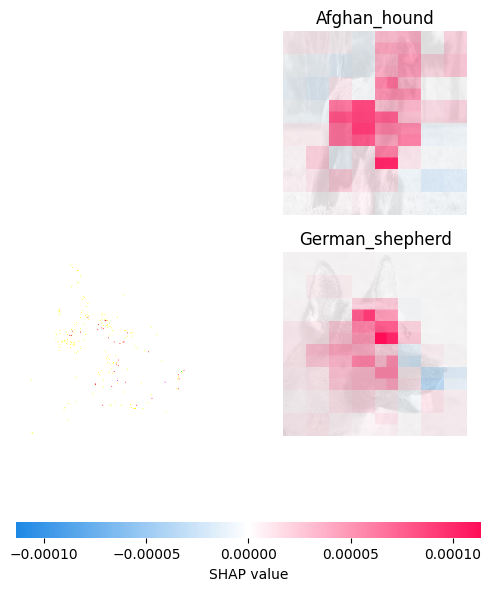

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
import json
import shap
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# load pre-trained model and choose two images to explain
model = ResNet50(weights='imagenet')
def f(X):
    return model(X)

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# load dog breed images and preprocess them
img_paths = ['/content/train/Afghan Hound/Image_15.gif', '/content/train/German Shepherd/Image_17.jpg']
imgs = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    imgs.append(img)
X = np.array(imgs)

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)


The blurred Red part in the output image tell about which part of image is used for prediction 

102967424/102967424 [==============================] - 1s 0us/step


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [04:23, 131.79s/it]


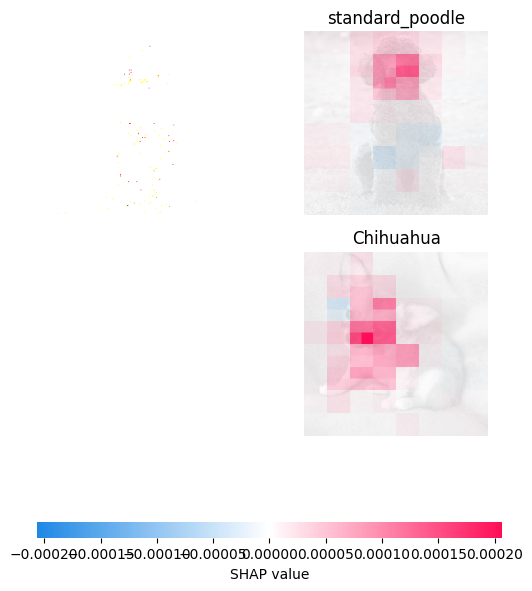

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
import json
import shap
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# load pre-trained model and choose two images to explain
model = ResNet50(weights='imagenet')
def f(X):
    return model(X)

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# load dog breed images and preprocess them
img_paths = ['/content/train/Poodle/Image_1.jpg', '/content/train/Chihuahua/Image_10.jpg']
imgs = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    imgs.append(img)
X = np.array(imgs)

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)
